<a href="https://colab.research.google.com/github/baykaa/toxicity-classification/blob/main/Toxicity_comment_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Toxicitiy Level of Online Comment - V2**

**01 - Load Model**

In [30]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
model_name = "unitary/toxic-bert"
toxicity_pipeline = pipeline("text-classification", model=model_name)

Model sample test:

In [31]:
text1 = 'You look tired, go home!'
text2 = 'The weather today is clear and sunny, perfect for a picnic'
text3 = 'I really enjoy learning new programming languages in my free time.'
text4 = 'The meeting was productive, and everyone shared great ideas'
text5 = 'This restaurant serves delicious food with excellent service'

print('text1 ', toxicity_pipeline(text1))
print(toxicity_pipeline(text2))
print(toxicity_pipeline(text3))
print(toxicity_pipeline(text4))
print(toxicity_pipeline(text5))

text1  [{'label': 'toxic', 'score': 0.1213851198554039}]
[{'label': 'toxic', 'score': 0.0005813140887767076}]
[{'label': 'toxic', 'score': 0.000621975283138454}]
[{'label': 'toxic', 'score': 0.0005218115984462202}]
[{'label': 'toxic', 'score': 0.0006950777606107295}]


**02 - Load the DATASET**

In [32]:
!pip install transformers datasets

In [33]:
from datasets import load_dataset
import pandas as pd

dataset = load_dataset('google/civil_comments')
df = pd.DataFrame(dataset['train'])
df

,text,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,sexual_explicit
0,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
3,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
4,haha you guys are a bunch of losers.,0.893617,0.021277,0.000000,0.0,0.872340,0.021277,0.0
...,...,...,...,...,...,...,...,...
1804869,"Maybe the tax on ""things"" would be collected w...",0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1804870,What do you call people who STILL think the di...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1804871,"thank you ,,,right or wrong,,, i am following ...",0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1804872,Anyone who is quoted as having the following e...,0.621212,0.030303,0.030303,0.0,0.621212,0.045455,0.0


In [34]:
print("Shape of the dataset:", df.shape)
print("Head of the dataset:")
print(df.head())

Shape of the dataset: (1804874, 8)
Head of the dataset:
                                                text  toxicity  \
0  This is so cool. It's like, 'would you want yo...  0.000000   
1  Thank you!! This would make my life a lot less...  0.000000   
2  This is such an urgent design problem; kudos t...  0.000000   
3  Is this something I'll be able to install on m...  0.000000   
4               haha you guys are a bunch of losers.  0.893617   

   severe_toxicity  obscene  threat   insult  identity_attack  sexual_explicit  
0         0.000000      0.0     0.0  0.00000         0.000000              0.0  
1         0.000000      0.0     0.0  0.00000         0.000000              0.0  
2         0.000000      0.0     0.0  0.00000         0.000000              0.0  
3         0.000000      0.0     0.0  0.00000         0.000000              0.0  
4         0.021277      0.0     0.0  0.87234         0.021277              0.0  


In [35]:
# Get the certain range from the data
range = 5000
df = df[:range]

print(f"First {range} rows:")
print(df)

First 5000 rows:
                                                   text  toxicity  \
0     This is so cool. It's like, 'would you want yo...  0.000000   
1     Thank you!! This would make my life a lot less...  0.000000   
2     This is such an urgent design problem; kudos t...  0.000000   
3     Is this something I'll be able to install on m...  0.000000   
4                  haha you guys are a bunch of losers.  0.893617   
...                                                 ...       ...   
4995  Wait just a moment here!!! Are you really sugg...  0.000000   
4996  You can call it reparation if you want but it ...  0.000000   
4997  Sorry to pop another of your bubbles but the c...  0.500000   
4998  Bill: In 1969 I was teaching in an inner-city ...  0.000000   
4999  He wants more courses taught by tenured facult...  0.000000   

      severe_toxicity  obscene  threat   insult  identity_attack  \
0            0.000000      0.0     0.0  0.00000         0.000000   
1            0.000

In [36]:
# Keep only the 'text' and 'toxicity' columns
df = df[['text', 'toxicity']]
df

,text,toxicity
0,"This is so cool. It's like, 'would you want yo...",0.000000
1,Thank you!! This would make my life a lot less...,0.000000
2,This is such an urgent design problem; kudos t...,0.000000
3,Is this something I'll be able to install on m...,0.000000
4,haha you guys are a bunch of losers.,0.893617
...,...,...
4995,Wait just a moment here!!! Are you really sugg...,0.000000
4996,You can call it reparation if you want but it ...,0.000000
4997,Sorry to pop another of your bubbles but the c...,0.500000
4998,Bill: In 1969 I was teaching in an inner-city ...,0.000000


**03 - Prediction Using Model**

In [37]:
# Predict toxicity for each text and store in a new column
df['prediction_score'] = df['text'].apply(lambda x: toxicity_pipeline(x)[0]['score'])
df

,text,toxicity,prediction_score
0,"This is so cool. It's like, 'would you want yo...",0.000000,0.022374
1,Thank you!! This would make my life a lot less...,0.000000,0.003937
2,This is such an urgent design problem; kudos t...,0.000000,0.000851
3,Is this something I'll be able to install on m...,0.000000,0.000735
4,haha you guys are a bunch of losers.,0.893617,0.967226
...,...,...,...
4995,Wait just a moment here!!! Are you really sugg...,0.000000,0.087981
4996,You can call it reparation if you want but it ...,0.000000,0.016318
4997,Sorry to pop another of your bubbles but the c...,0.500000,0.069352
4998,Bill: In 1969 I was teaching in an inner-city ...,0.000000,0.001328


In [38]:
# Round the scores to 2 decimal places
df['toxicity'] = df['toxicity'].round(2)
df['prediction_score'] = df['prediction_score'].round(2)
df

,text,toxicity,prediction_score
0,"This is so cool. It's like, 'would you want yo...",0.00,0.02
1,Thank you!! This would make my life a lot less...,0.00,0.00
2,This is such an urgent design problem; kudos t...,0.00,0.00
3,Is this something I'll be able to install on m...,0.00,0.00
4,haha you guys are a bunch of losers.,0.89,0.97
...,...,...,...
4995,Wait just a moment here!!! Are you really sugg...,0.00,0.09
4996,You can call it reparation if you want but it ...,0.00,0.02
4997,Sorry to pop another of your bubbles but the c...,0.50,0.07
4998,Bill: In 1969 I was teaching in an inner-city ...,0.00,0.00


In [39]:
# Label based on toxicity scores
def label_toxicity(score):
    if score == 0:
        return "non toxic"
    elif 0 < score <= 0.5:
        return "less toxic"
    else:
        return "highly toxic"

df['actual_label'] = df['toxicity'].apply(label_toxicity)
df['predicted_label'] = df['prediction_score'].apply(label_toxicity)
print(df.head())

                                                text  toxicity  \
0  This is so cool. It's like, 'would you want yo...      0.00   
1  Thank you!! This would make my life a lot less...      0.00   
2  This is such an urgent design problem; kudos t...      0.00   
3  Is this something I'll be able to install on m...      0.00   
4               haha you guys are a bunch of losers.      0.89   

   prediction_score  actual_label predicted_label  
0              0.02     non toxic      less toxic  
1              0.00     non toxic       non toxic  
2              0.00     non toxic       non toxic  
3              0.00     non toxic       non toxic  
4              0.97  highly toxic    highly toxic  


**04 - Evaluate Predictions**

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# Calculate accuracy
accuracy = accuracy_score(df['actual_label'], df['predicted_label'])
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 75.08%


**Confusion Matrix**

In [42]:
# Create a confusion matrix
labels = ['non toxic', 'less toxic', 'highly toxic']  # Use your specific labels
conf_matrix = confusion_matrix(df['actual_label'], df['predicted_label'], labels=labels)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[3170  694   12]
 [ 414  509   38]
 [   9   79   75]]


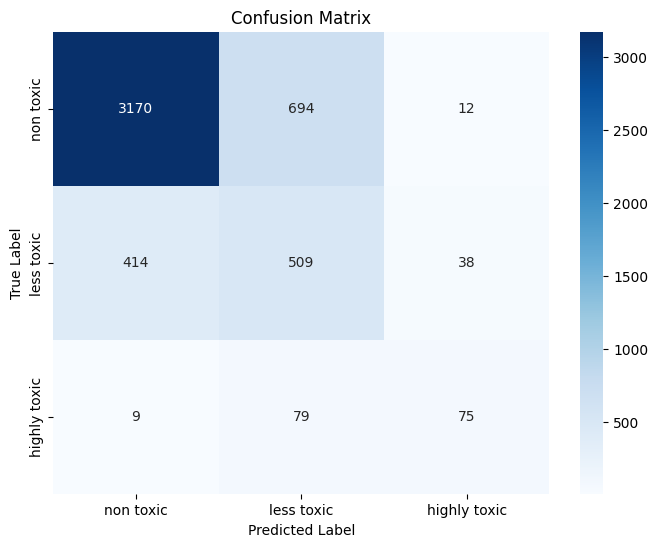

In [43]:
# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**06 - Conclusion**

From the confusion matrix, we observe the following results:

*   True Negatives (TN) = 3,170: 3,170 non-toxic samples were correctly identified as non-toxic.

*   False Positives (FP) = 694: 694 non-toxic samples were incorrectly identified as less toxic.
*   False Negatives (FN) = 414: 414 less toxic samples were incorrectly classified as non-toxic.
*   True Positives (TP) = 75: 75 highly toxic samples were correctly identified as highly toxic.

*   Accuracy: 77.00% . The model correctly classified 77% of the samples, which indicates decent overall performance.

However, this matrix indicates that the model struggles to accurately classify less toxic and highly toxic samples. A significant portion of less toxic texts are misclassified as non-toxic, and some highly toxic samples are labeled as less toxic. This suggests that the model has difficulty distinguishing between borderline levels of toxicity, likely due to class imbalance, where the non-toxic class dominates the dataset.